Hypothesis Generation

Import modules

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Loading Packages and Data

In [3]:
df = pd.read_csv('Train.csv')
# Display the first few rows of the DataFrame
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [14]:
# DataType of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
# Statistical info
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [12]:
# Unique values
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Data Preprocessing


In [18]:
# Check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [19]:
# Removing unnecessary coulmns
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [17]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2   

Handle missing values

In [20]:
# Null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
# Calculating the mean based on Item_Identifier to fill missing values in Item_Weight (using pivot table)
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
miss_bool = df['Item_Weight'].isnull()
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            #Assigning the mean of item weights to keys not present in mean table
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [24]:
df['Item_Weight'].isnull().sum()

0

In [26]:
# Outlet_Type is a categorical attribute so we will use Mode & use the aggregation function from the pivot table
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [27]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [28]:
df['Outlet_Size'].isnull().sum()

0

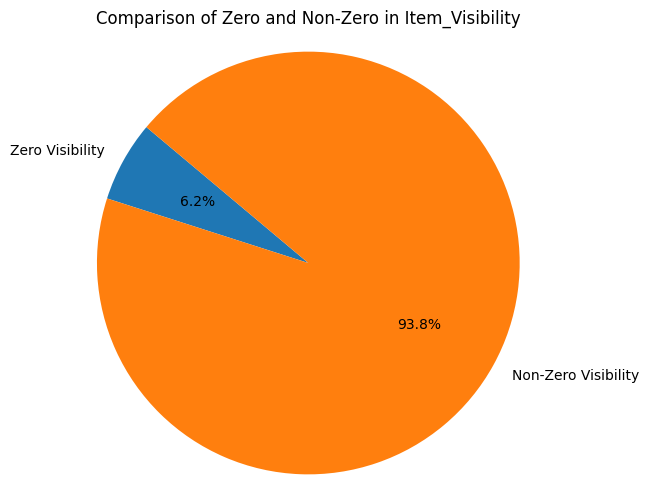

In [32]:
# We also may replace zeros in Item_Visibility with mean value
# Filter the DataFrame to get zero and non-zero values in 'Item_Visibility'
zero_visibility = df[df['Item_Visibility'] == 0]
non_zero_visibility = df[df['Item_Visibility'] > 0]

# Count the occurrences of zero and non-zero values
zero_count = len(zero_visibility)
non_zero_count = len(non_zero_visibility)

# Create labels for the pie chart
labels = ['Zero Visibility', 'Non-Zero Visibility']

# Create data for the pie chart
sizes = [zero_count, non_zero_count]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Comparison of Zero and Non-Zero in Item_Visibility')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Display the pie chart
plt.show()


In [33]:
# replace zeros with mean 
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [34]:
sum(df['Item_Visibility']==0)

0

Combine Item_Fat_Content to two Categories


In [36]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Creation of new Attributes

In [53]:
# Outlet_Age -> calculate the age of the Outlet since its introduction.
df['Outlet_Age'] = 2023 - df['Outlet_Establishment_Year']
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.066132   
4           NCD19         8.93   Non-Nutritious         0.066132   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Age Product_Category  
0  Supermarket Type1          3735.1380          24             Food  
1  Supermarket Type2           443.4228          14           Drinks  
2  Supermarket Type1          2097.2700          24             Food  
3      Grocery Store           732.3800          25             Food  
4  Supermarket Type1           994.7052          36   Non-Consumable

In [50]:
# A new Product_Category using Item_Identifier
df['Product_Category'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['Product_Category'] = df['Product_Category'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['Product_Category'].value_counts()

Product_Category
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [52]:
df.loc[df['Product_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Nutritious'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat           3918
Regular           3006
Non-Nutritious    1599
Name: count, dtype: int64

Exploratory Data Analysis (EDA)

Numerical Columns


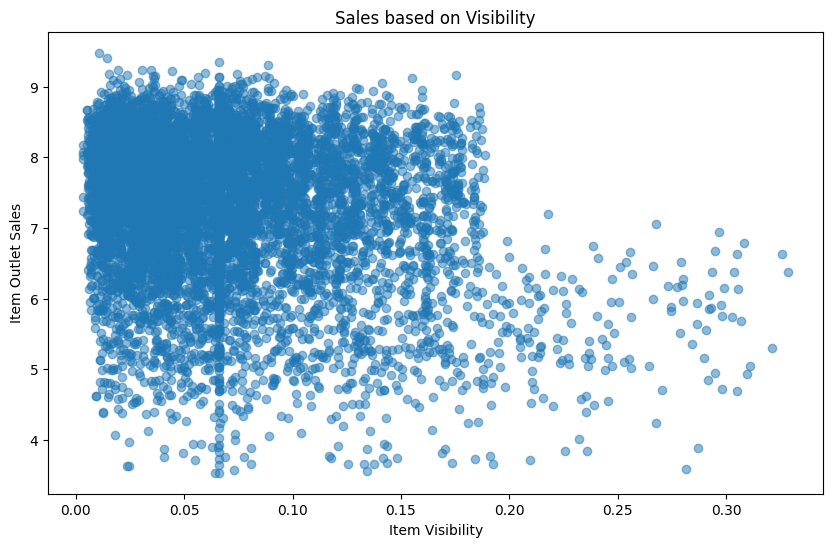

In [124]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Item_Visibility'], df['Item_Outlet_Sales'], alpha=0.5)
plt.title('Sales based on Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')

# Show the plot
plt.show()

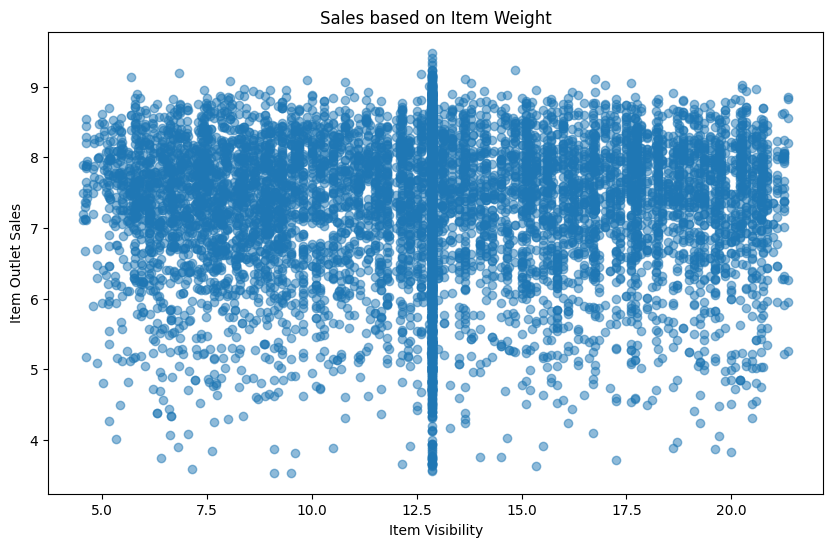

In [125]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'], alpha=0.5)
plt.title('Sales based on Item Weight')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')

# Show the plot
plt.show()

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

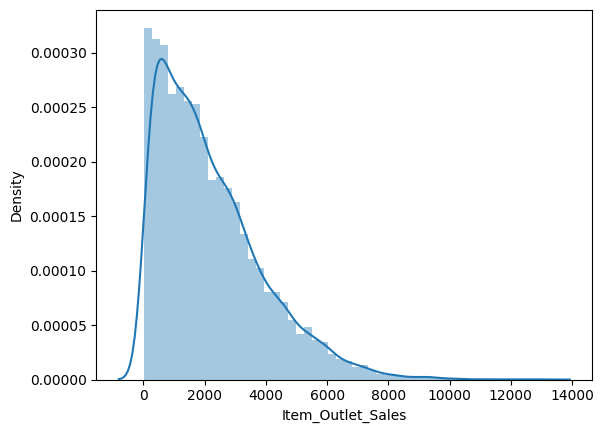

In [54]:
sns.distplot(df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

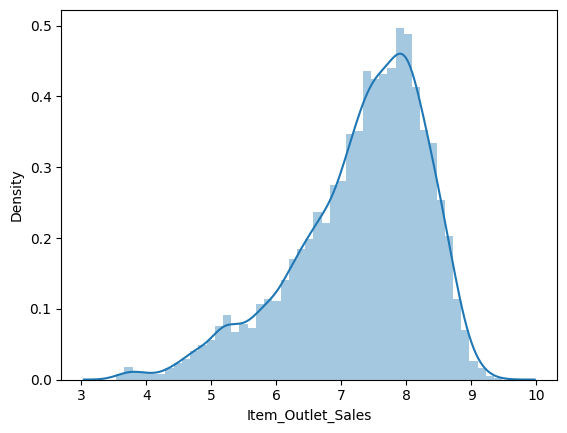

In [55]:
# Normalize this using log transformation so data be normally distributed
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])
sns.distplot(df['Item_Outlet_Sales'])

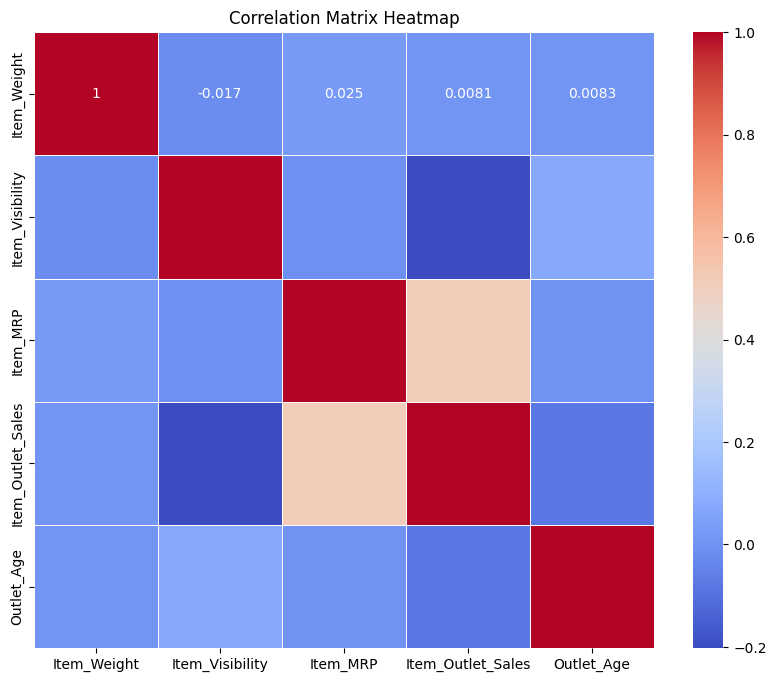

In [66]:
# Select the columns of interest
columns_of_interest = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Age']

# Create a subset of the DataFrame with the selected columns
subset_df = df[columns_of_interest]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


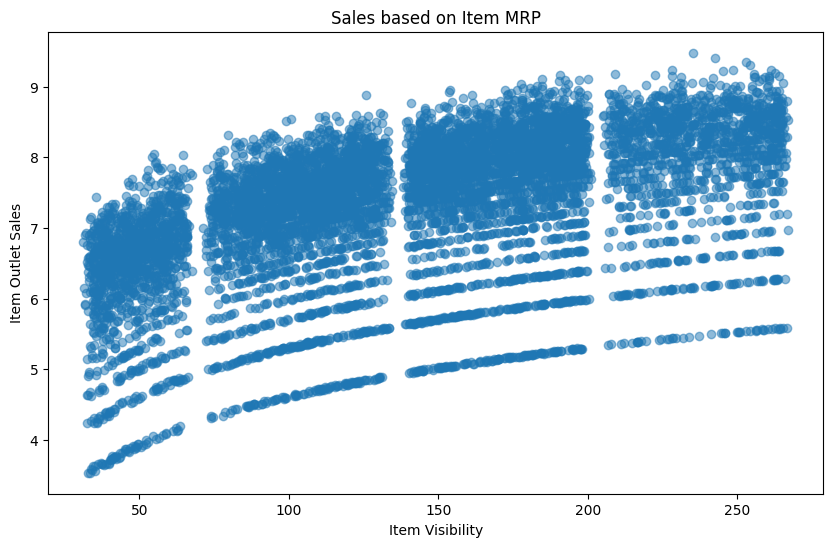

In [126]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'], alpha=0.5)
plt.title('Sales based on Item MRP')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')

# Show the plot
plt.show()

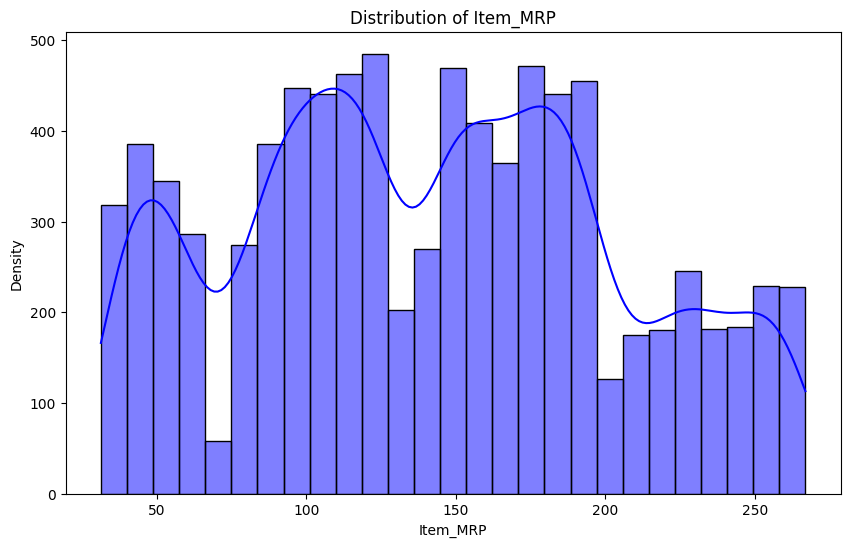

In [69]:
item_mrp = df['Item_MRP']

# Create a density plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(item_mrp, kde=True, color='blue')
plt.title('Distribution of Item_MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Density')

# Show the plot
plt.show()


Categorical Columns

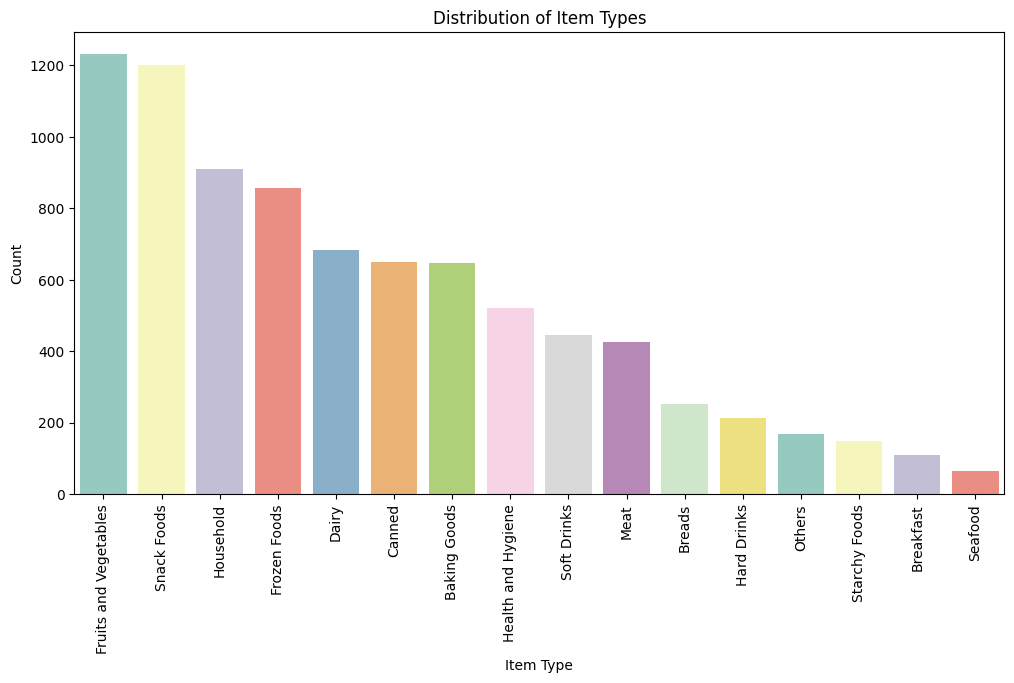

In [71]:
item_type_counts = df['Item_Type'].value_counts()

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type', data=df, order=item_type_counts.index, palette='Set3')
plt.title('Distribution of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


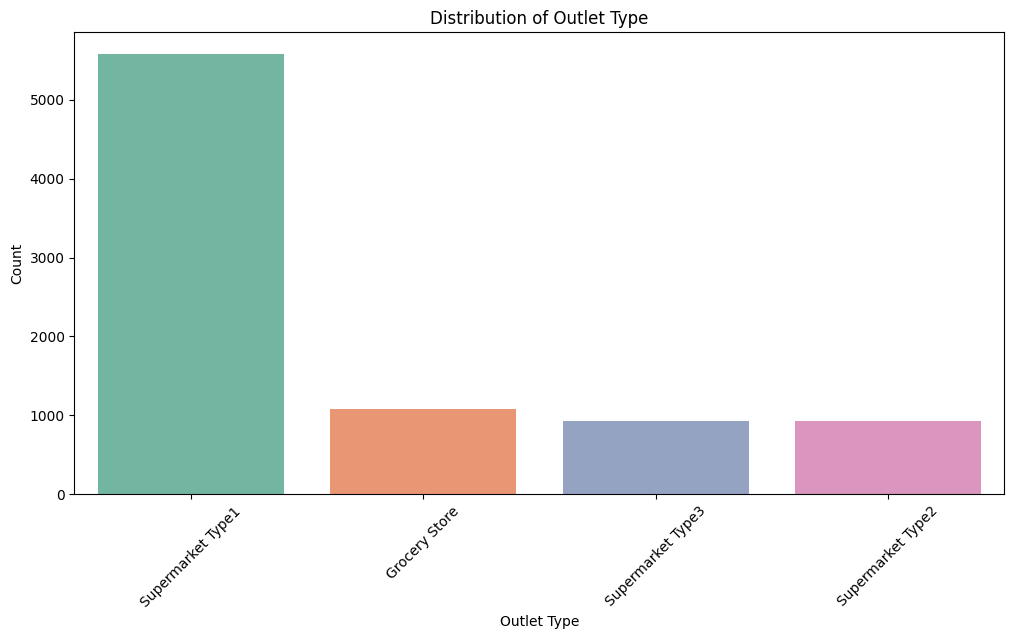

In [76]:
outlet_type_counts = df['Outlet_Type'].value_counts()

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Outlet_Type', data=df, order=outlet_type_counts.index, palette='Set2')
plt.title('Distribution of Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Label Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Product_Category']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

One Hot Encoding

In [101]:
#df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Product_Category'])
df.head()

Item_Identifier  Item_Weight  Item_Visibility  Item_Type  Item_MRP  \
0           FDA15         9.30         0.016047          4  249.8092   
1           DRC01         5.92         0.019278         14   48.2692   
2           FDN15        17.50         0.016760         10  141.6180   
3           FDX07        19.20         0.066132          6  182.0950   
4           NCD19         8.93         0.066132          9   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales  Outlet_Age  \
0            OUT049                       1999           8.225808          24   
1            OUT018                       2009           6.096776          14   
2            OUT049                       1999           7.648868          24   
3            OUT010                       1998           6.597664          25   
4            OUT013                       1987           6.903451          36   

   Outlet  ...  Outlet_Location_Type_0  Outlet_Location_Type_1  \
0       9  ...                    True                   False   
1       3  ...                   False                   False   
2       9  ...                    True                   False   
3       0  ...                   False                   False   
4       1  ...                   False                   False   

   Outlet_Location_Type_2  Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  \
0                   False          False           True          False   
1                    True          False          False           True   
2                   False          False           True          False   
3                    True           True          False          False   
4                    True          False           True          False   

   Outlet_Type_3  Product_Category_0  Product_Category_1  Product_Category_2  
0          False               False                True               False  
1          False                True               False               False  
2          False               False                True               False  
3          False               False                True               False  
4          False               False               False                True  

[5 rows x 26 columns]

Modeling

Linear Regression

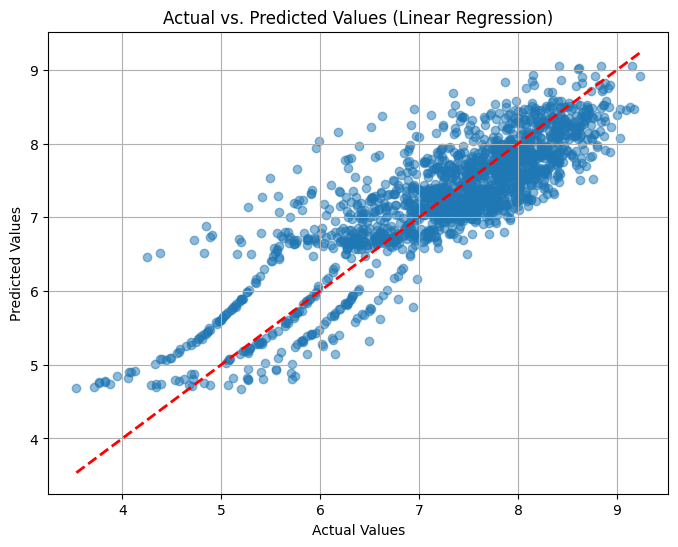

Mean Squared Error (MSE): 0.2839342191367859
R-squared (R2): 0.7299321689007461


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])  # Features
y = df['Item_Outlet_Sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Linear Regression model
model = LinearRegression()
# Train the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a line representing the identity line (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

# Show the plot
plt.show()
print(f'Mean Squared Error (MSE): {lr_mse}')
print(f'R-squared (R2): {lr_r2}')

Regularized Linear Regression : Ridge Regression

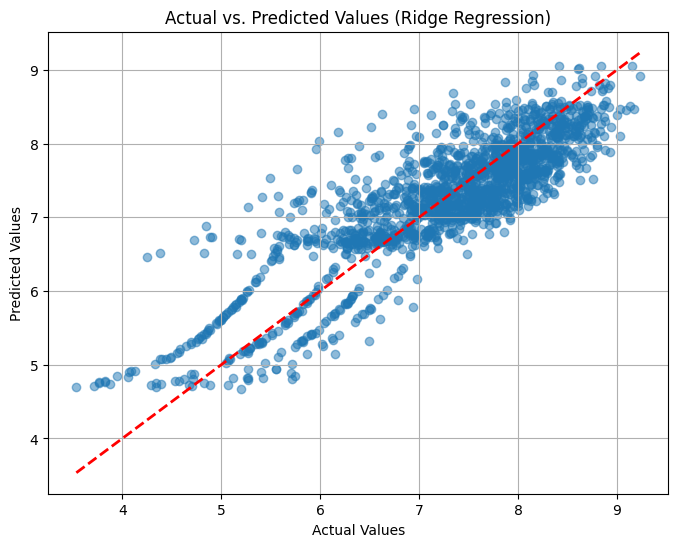

Mean Squared Error (MSE): 0.2844564355418816
R-squared (R2): 0.7294354557806529


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])  # Features
y = df['Item_Outlet_Sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Ridge Regression model with regularization parameter alpha
alpha = 1.0  # You can adjust the alpha value for different levels of regularization
ridge_model = Ridge(alpha=alpha)
# Train the model on the training data
ridge_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

rg_mse = mean_squared_error(y_test, y_pred)
rg_r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a line representing the identity line (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

# Show the plot
plt.show()

print(f'Mean Squared Error (MSE): {rg_mse}')
print(f'R-squared (R2): {rg_r2}')

Regularized Linear Regression : Lasso Regression

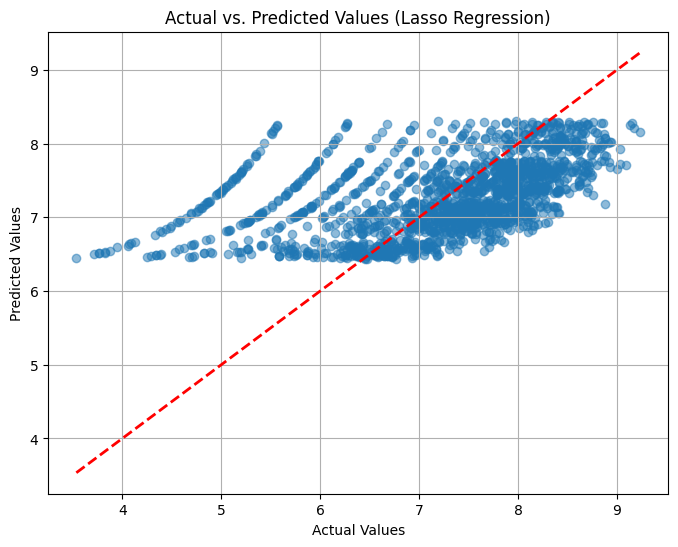

Mean Squared Error (MSE): 0.7802512392720906
R-squared (R2): 0.2578535953033425


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])  # Features
y = df['Item_Outlet_Sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Lasso Regression model with regularization parameter alpha
alpha = 1.0  # You can adjust the alpha value for different levels of regularization
lasso_model = Lasso(alpha=alpha)
# Train the model on the training data
lasso_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

ls_mse = mean_squared_error(y_test, y_pred)
ls_r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a line representing the identity line (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

# Show the plot
plt.show()

print(f'Mean Squared Error (MSE): {ls_mse}')
print(f'R-squared (R2): {ls_r2}')

Random Forest Regression

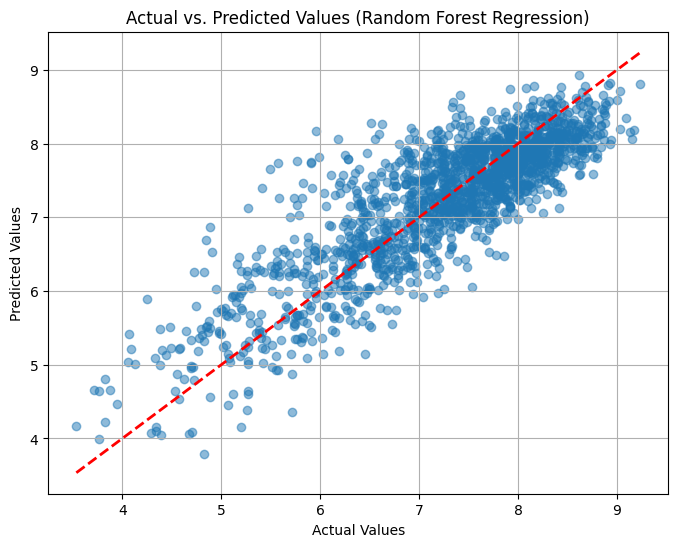

Mean Squared Error (MSE): 0.29827114568681956
R-squared (R2): 0.7162954094084653


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])  # Features
y = df['Item_Outlet_Sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
# Train the model on the training data
rf_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values (Random Forest Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a line representing the identity line (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

# Show the plot
plt.show()

print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'R-squared (R2): {rf_r2}')


In [ ]:
XGBoost Regression

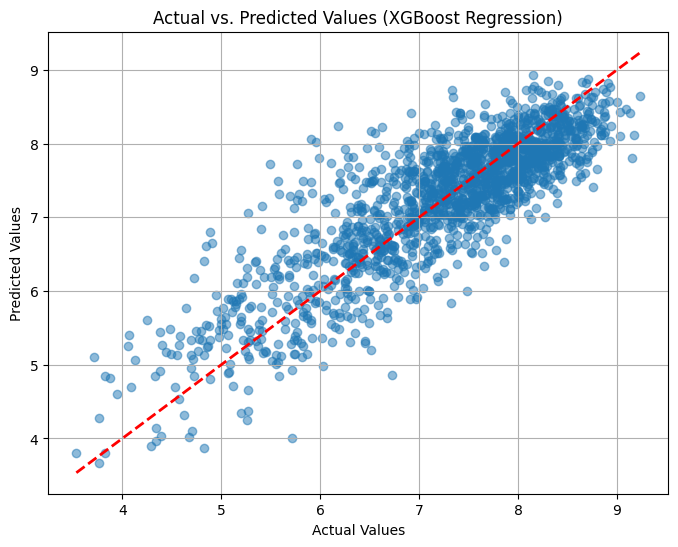

Mean Squared Error (MSE): 0.30407464497732256
R-squared (R2): 0.7107753334171416


In [156]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])  # Features
y = df['Item_Outlet_Sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
# Train the model on the training data
xgb_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values (XGBoost Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a line representing the identity line (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

# Show the plot
plt.show()

print(f'Mean Squared Error (MSE): {xgb_mse}')
print(f'R-squared (R2): {xgb_r2}')

Cnclousion

In [157]:
mse= [lr_mse,rf_mse,ls_mse,xgb_mse]
r2= [lr_r2,rf_r2,ls_r2,xgb_r2]
scores=pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor","XGBRegressor"],
     'mse' : mse, 'r2' : r2})
scores

models       mse        r2
0        Linear Regression  0.283934  0.729932
1  Random Forest Regressor  0.298271  0.716295
2          Lasso Regressor  0.780251  0.257854
3             XGBRegressor  0.304075  0.710775